# Model Fitting and Evaluating

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50
## Install xlrd package to load Excel files
# conda install openpyxl
## conda install xlrd

In [2]:
df = pd.read_csv("Data_Marketing_Customer_Analysis_Round3.csv")
df.head()

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize


### Only using numeric values

In [3]:
df = df.select_dtypes(include=np.number)

In [4]:
df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,92260,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,33,31,0,7,707
...,...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7,1214
10685,5259,61146,65,7,68,0,6,273
10686,23893,39837,201,11,63,0,2,381
10687,11971,64195,158,0,27,4,6,618


### Doing X-y split (y is the target variable, which is the total claim amount)

In [5]:
y = df.total_claim_amount

In [6]:
X  =  df.drop(columns=["total_claim_amount"])

In [7]:
X

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,4809,48029,61,7,52,0,9
1,2228,92260,64,3,26,0,1
2,14947,22139,100,34,31,0,2
3,22332,49078,97,10,3,0,2
4,9025,23675,117,33,31,0,7
...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7
10685,5259,61146,65,7,68,0,6
10686,23893,39837,201,11,63,0,2
10687,11971,64195,158,0,27,4,6


### Doing the Train-test split

In [8]:
TT_RATIO = 0.3 #test/train
RAND_STATE = 42 #for reproducible shuffling (if you don't choose a random choice, the code always uses different values to
# create the test and train sample)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TT_RATIO, random_state=RAND_STATE)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
X_train.head(3)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
10237,8663,42169,83,18,90,1,2
2689,4213,12160,109,5,34,0,1
4489,2359,19864,63,22,96,0,1


### Standardizing the data (after the data split)

#### Power Transformer: we use a power transformer to remove the skew and rescale the data to have zero mean and unit variance. It improves modeling errors in linear regression.
#### Standard scaler only rescales the data --> looking at the graph is here more helpful in case of getting a feel for the shape of the distribution

In [10]:
help(ColumnTransformer)

Help on class ColumnTransformer in module sklearn.compose._column_transformer:

class ColumnTransformer(sklearn.base.TransformerMixin, sklearn.utils.metaestimators._BaseComposition)
 |  ColumnTransformer(transformers, *, remainder='drop', sparse_threshold=0.3, n_jobs=None, transformer_weights=None, verbose=False, verbose_feature_names_out=True)
 |  
 |  Applies transformers to columns of an array or pandas DataFrame.
 |  
 |  This estimator allows different columns or column subsets of the input
 |  to be transformed separately and the features generated by each transformer
 |  will be concatenated to form a single feature space.
 |  This is useful for heterogeneous or columnar data, to combine several
 |  feature extraction mechanisms or transformations into a single transformer.
 |  
 |  Read more in the :ref:`User Guide <column_transformer>`.
 |  
 |  .. versionadded:: 0.20
 |  
 |  Parameters
 |  ----------
 |  transformers : list of tuples
 |      List of (name, transformer, colum

In [11]:
pt = PowerTransformer()
ct = ColumnTransformer([("pt", pt, list(X.columns))],
                        remainder='drop',verbose_feature_names_out=True,verbose=True).fit(X_train)
X_train = pd.DataFrame(ct.transform(X_train),columns=ct.get_feature_names_out())
X_test = pd.DataFrame(ct.transform(X_test),columns=ct.get_feature_names_out())


[ColumnTransformer] ............ (1 of 1) Processing pt, total=   0.1s


In [12]:
X_train = pd.DataFrame(X_train)
X_test

,pt__customer_lifetime_value,pt__income,pt__monthly_premium_auto,pt__months_since_last_claim,pt__months_since_policy_inception,pt__number_of_open_complaints,pt__number_of_policies
0,-0.312154,0.868647,-1.539101,-1.945679,1.033026,-0.508544,1.123668
1,0.678470,-0.252914,1.007105,-0.348090,1.033026,-0.508544,0.504672
2,-1.090901,0.724469,-0.159696,-1.945679,-0.019629,-0.508544,-1.150371
3,-0.244508,0.468224,-1.253537,0.578399,-2.089380,1.920119,0.504672
4,0.550007,-0.089898,2.001090,-1.113611,-0.930490,1.920119,-1.150371
...,...,...,...,...,...,...,...
3202,-0.614209,-0.742668,0.846984,-0.697339,-0.527992,-0.508544,-1.150371
3203,-0.143475,0.257463,-0.999047,-1.945679,-1.291486,-0.508544,1.665845
3204,-1.474492,-1.305799,-0.700342,1.036463,0.349453,-0.508544,-1.150371
3205,-0.383939,-0.553228,1.068603,-1.113611,0.150886,1.920119,-1.150371


### Using linear regression model

In [13]:
X_train_const = sm.add_constant(X_train.to_numpy()) # adding the constant, needs to be added in statsmodell!!
# otherwise this i zero 

model = sm.OLS(y_train, X_train_const).fit() #creating parameters for my model using x and y-train


y_pred_train = model.predict(X_train_const)
#inputting all X-train and output of model.predict is the predicted y-train values as an array
#predicted y-train values are not really needed for model creation but later on for comparison of model errors


X_test_const = sm.add_constant(X_test) # X_test is not changend, only constant is added otherwise library statsmodell
#can't process and work with it

y_pred_test = model.predict(X_test_const)
#y hat the predicted values of my X_test input

print_model = model.summary()
print(print_model)
#R² is here for the train set, in the end we need R² for the test set!! so more steps needed

                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     482.7
Date:                Wed, 01 Feb 2023   Prob (F-statistic):               0.00
Time:                        22:07:14   Log-Likelihood:                -51747.
No. Observations:                7482   AIC:                         1.035e+05
Df Residuals:                    7474   BIC:                         1.036e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        433.3067      2.823    153.516      0.0

In [26]:
model.coef_

AttributeError: 'OLSResults' object has no attribute 'coef_'

In [25]:
model.intercept_

AttributeError: 'OLSResults' object has no attribute 'intercept_'

### Model Interpretation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.scatterplot(x=y_test, y=y_pred_test)

In [ ]:
sns.scatterplot(x=y_pred_test, y=y_test)

In [ ]:
#PZ
sns.regplot(x='y_pred',y='y_test', data=pd.DataFrame({"y_test": y_test, "y_pred": y_pred_test}) ,
            scatter_kws={"color": "red"}, line_kws={"color": "black"})
#with regplot it's possible to add line_kws

# Model Evaluation and Improving

### Error metrics 

#### 1. MSE

In [27]:
mse = mse(y_test,y_pred_test)
mse

57867.923045991636

#### 2. RMSE

In [37]:
import math
rmse = math.sqrt(mse)
rmse

240.55752544036454

#### 3.MAE

In [28]:
mae = mae(y_test,y_pred_test)
mae

168.3317120432042

#### 4. R2

In [19]:
R2 = r2_score(y_test,y_pred_test)
R2

0.30706397558100207

#### 5. Adjusted R2


In [30]:
Adj_R2 = 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
Adj_R2

0.30554770419277666

In [31]:
R2_test = model.score(X_test_const,y_test)
R2_train = model.score(X_train_const,y_train)


AttributeError: 'OLSResults' object has no attribute 'score'

### Feature Importances

In [22]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_.reshape(len(X_train.columns),))
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)
features_importances

AttributeError: 'OLSResults' object has no attribute 'coef_'

In [ ]:
plt.bar(x=features_importances['Attribute'].iloc[:10], height=features_importances['Importance'].iloc[:10], color='#087E8B')
plt.title('Feature importance rankings', size=12)
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot: xlabel='monthly_premium_auto', ylabel='total_claim_amount'>

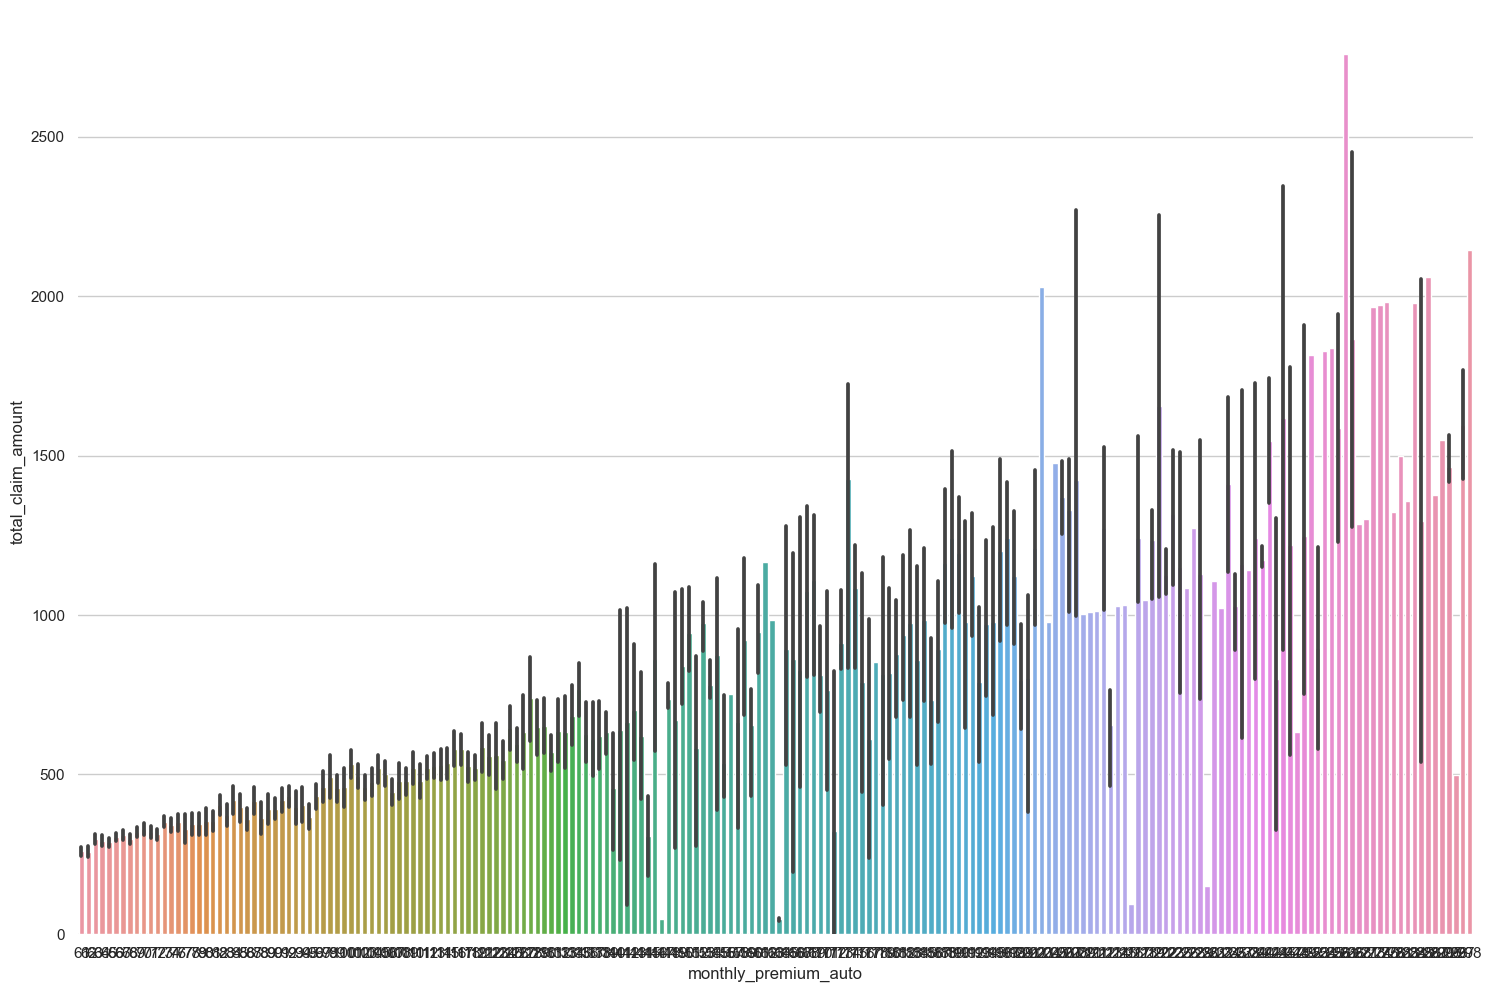

In [40]:
sns.set_style('whitegrid')
sns.set_context('notebook')
sns.color_palette("bright")

f, ax = plt.subplots(figsize=(18, 12))
sns.despine(f, left=True, bottom=True)
sns.barplot(x="monthly_premium_auto", y="total_claim_amount", data=df, ax=ax)